### Ingesting Data

In [2]:
import sys
import pandas as pd
import pyarrow
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

data_file_path = '../data/data.parquet.gzip'
voucher_df = pd.read_parquet(data_file_path)
voucher_df.head()

timestamp country_code              last_order_ts  \
0  2020-05-20 15:43:38.364972+00:00        China  2020-04-19 00:00:00+00:00   
1  2020-05-20 15:43:47.914346+00:00        China  2020-04-19 00:00:00+00:00   
2  2020-05-20 15:36:56.866239+00:00        China  2020-04-19 00:00:00+00:00   
3  2020-05-20 15:00:33.694108+00:00        China  2020-04-19 00:00:00+00:00   
4  2020-05-20 15:43:18.521402+00:00        China  2020-04-19 00:00:00+00:00   

             first_order_ts total_orders  voucher_amount  
0 2020-04-18 00:00:00+00:00          0.0          5720.0  
1 2020-04-13 00:00:00+00:00          1.0          8800.0  
2 2020-04-15 00:00:00+00:00          0.0          1760.0  
3 2020-04-13 00:00:00+00:00                       1760.0  
4 2020-04-14 00:00:00+00:00          3.0          8800.0

### Data Cleaning and type conversion

In [2]:
voucher_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511427 entries, 0 to 511426
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   timestamp       511427 non-null  object             
 1   country_code    511427 non-null  object             
 2   last_order_ts   511427 non-null  object             
 3   first_order_ts  511427 non-null  datetime64[ns, UTC]
 4   total_orders    511427 non-null  object             
 5   voucher_amount  481860 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(1), object(4)
memory usage: 23.4+ MB


In [3]:
voucher_df.shape

(511427, 6)

In [4]:
voucher_df.drop_duplicates(inplace=True)

In [5]:
voucher_df.shape

(511415, 6)

In [6]:
voucher_df.dtypes

timestamp                      object
country_code                   object
last_order_ts                  object
first_order_ts    datetime64[ns, UTC]
total_orders                   object
voucher_amount                float64
dtype: object

### Data type conversion

In [23]:
import numpy as np

voucher_df['total_orders'] = pd.to_numeric(voucher_df['total_orders'], errors='coerce')
voucher_df['total_orders'] = voucher_df['total_orders'].replace(np.nan, 0, regex=True)
voucher_df['total_orders'] = voucher_df['total_orders'].astype(int)
voucher_df['voucher_amount'] = voucher_df['voucher_amount'].replace(np.nan, 0, regex=True)
voucher_df['timestamp'] = pd.to_datetime(voucher_df.timestamp, format='%Y-%m-%d %H:%M:%S', errors='coerce')
voucher_df['last_order_ts'] = pd.to_datetime(voucher_df.last_order_ts, format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [24]:
voucher_df.dtypes

timestamp         datetime64[ns, UTC]
country_code                   object
last_order_ts     datetime64[ns, UTC]
first_order_ts    datetime64[ns, UTC]
total_orders                    int64
voucher_amount                float64
dtype: object

In [25]:
voucher_df.head()

timestamp country_code             last_order_ts  \
0 2020-05-20 15:43:38.364972+00:00        China 2020-04-19 00:00:00+00:00   
1 2020-05-20 15:43:47.914346+00:00        China 2020-04-19 00:00:00+00:00   
2 2020-05-20 15:36:56.866239+00:00        China 2020-04-19 00:00:00+00:00   
3 2020-05-20 15:00:33.694108+00:00        China 2020-04-19 00:00:00+00:00   
4 2020-05-20 15:43:18.521402+00:00        China 2020-04-19 00:00:00+00:00   

             first_order_ts  total_orders  voucher_amount  
0 2020-04-18 00:00:00+00:00             0          5720.0  
1 2020-04-13 00:00:00+00:00             1          8800.0  
2 2020-04-15 00:00:00+00:00             0          1760.0  
3 2020-04-13 00:00:00+00:00             0          1760.0  
4 2020-04-14 00:00:00+00:00             3          8800.0

### EDA

In [26]:
voucher_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 511415 entries, 0 to 511426
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   timestamp       511415 non-null  datetime64[ns, UTC]
 1   country_code    511415 non-null  object             
 2   last_order_ts   511415 non-null  datetime64[ns, UTC]
 3   first_order_ts  511415 non-null  datetime64[ns, UTC]
 4   total_orders    511415 non-null  int64              
 5   voucher_amount  511415 non-null  float64            
dtypes: datetime64[ns, UTC](3), float64(1), int64(1), object(1)
memory usage: 27.3+ MB


In [27]:
voucher_df['voucher_amount'].describe()

count    511415.000000
mean       4717.833462
std        3593.137235
min           0.000000
25%        2200.000000
50%        3520.000000
75%        5720.000000
max       13200.000000
Name: voucher_amount, dtype: float64

In [35]:
voucher_df.shape

(511415, 6)

In [79]:
voucher_df_filtered = voucher_df.dropna(how='any',axis=0) 

In [80]:
voucher_df_filtered.shape

(511415, 6)

In [81]:
voucher_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 511415 entries, 0 to 511426
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   timestamp       511415 non-null  datetime64[ns, UTC]
 1   country_code    511415 non-null  object             
 2   last_order_ts   511415 non-null  datetime64[ns, UTC]
 3   first_order_ts  511415 non-null  datetime64[ns, UTC]
 4   total_orders    511415 non-null  int64              
 5   voucher_amount  511415 non-null  float64            
dtypes: datetime64[ns, UTC](3), float64(1), int64(1), object(1)
memory usage: 27.3+ MB


count    511415.000000
mean       4717.833462
std        3593.137235
min           0.000000
25%        2200.000000
50%        3520.000000
75%        5720.000000
max       13200.000000
Name: voucher_amount, dtype: float64


/Users/shubhambhatnagar/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


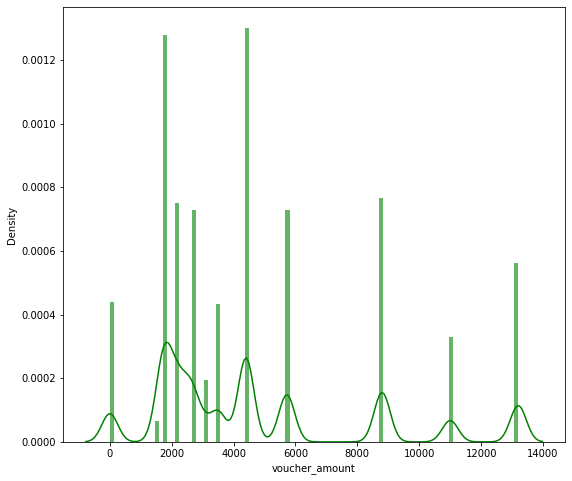

In [39]:
voucher_df_filtered['voucher_amount'].describe()

print(voucher_df_filtered['voucher_amount'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(voucher_df_filtered['voucher_amount'], color='g', bins=100, hist_kws={'alpha': 0.6});


In [40]:
voucher_df_filtered_num = voucher_df_filtered.select_dtypes(include = ['float64', 'int64'])
voucher_df_filtered_num.head()

total_orders  voucher_amount
0             0          5720.0
1             1          8800.0
2             0          1760.0
3             0          1760.0
4             3          8800.0

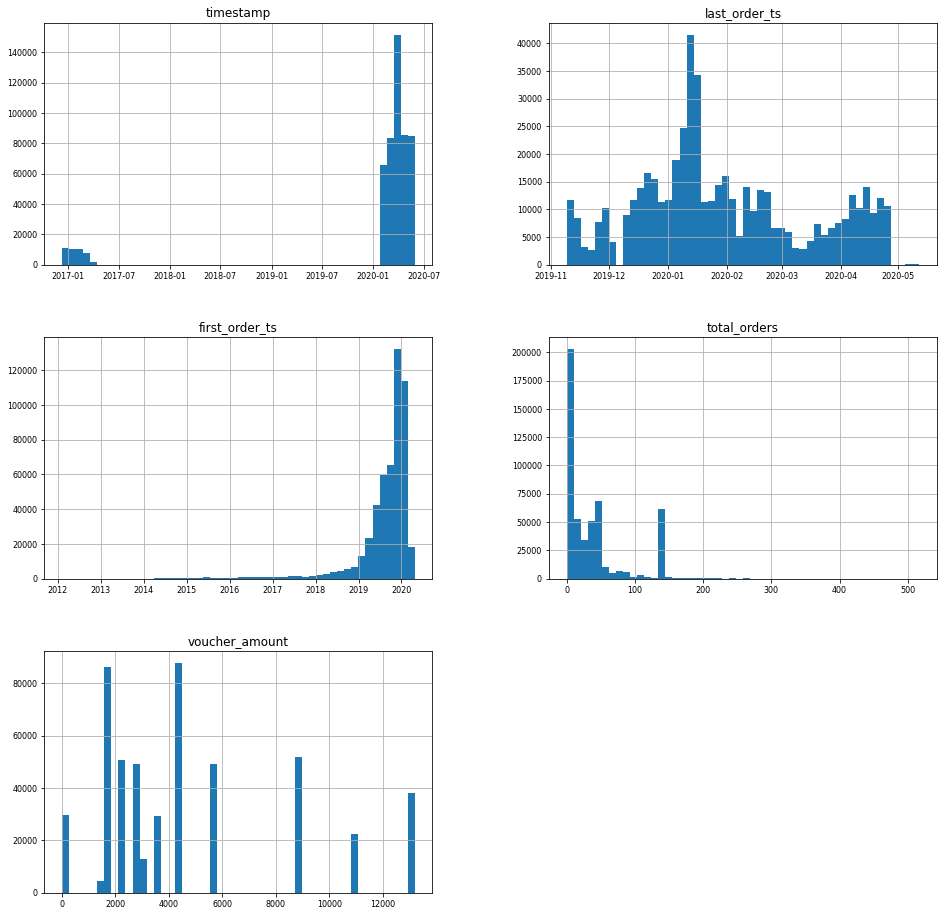

In [41]:
voucher_df_filtered.hist(figsize=(16, 16), bins=50, xlabelsize=8, ylabelsize=8);

In [42]:
voucher_df_filtered_num.hist(figsize=(16, 16), bins=50, xlabelsize=8, ylabelsize=8);

<AxesSubplot:>

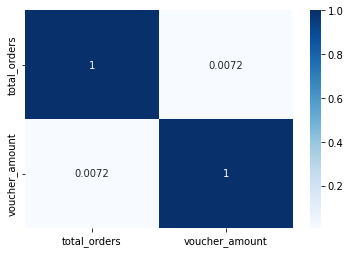

In [43]:
import seaborn as sb
corr = voucher_df_filtered_num.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

In [44]:
voucher_df_filtered_num.boxplot(figsize = (11,12))

<AxesSubplot:>

<AxesSubplot:title={'center':'total_orders'}, xlabel='country_code'>

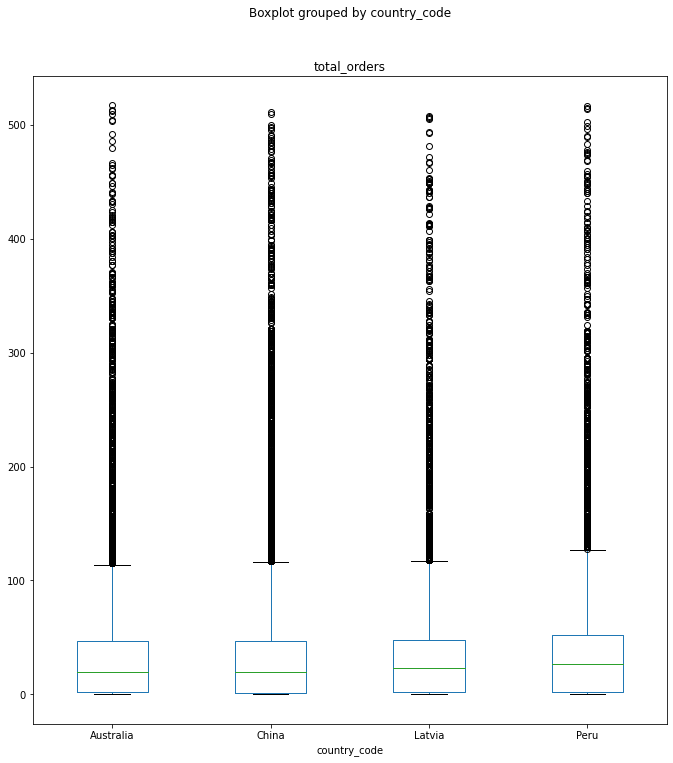

In [45]:
voucher_df_filtered.boxplot(by ='country_code', column =['total_orders'], grid = False, figsize = (11,12))

### Outlier Removal

In [46]:
quantile_86 = voucher_df_filtered['total_orders'].quantile(0.86)
quantile_86

108.0

In [47]:
quantile_86 = voucher_df_filtered['total_orders'].quantile(0.86)
quantile_86

voucher_df_filtered_outlired = voucher_df_filtered[voucher_df_filtered["total_orders"] < quantile_86]

<AxesSubplot:title={'center':'total_orders'}, xlabel='country_code'>

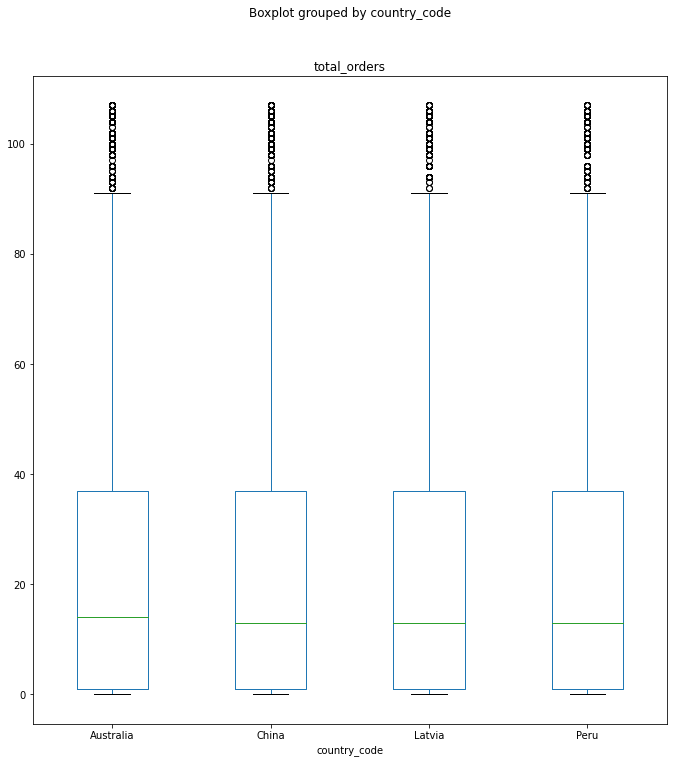

In [48]:
voucher_df_filtered_outlired.boxplot(by ='country_code', column =['total_orders'], grid = False, figsize = (11,12))

<AxesSubplot:title={'center':'voucher_amount'}, xlabel='country_code'>

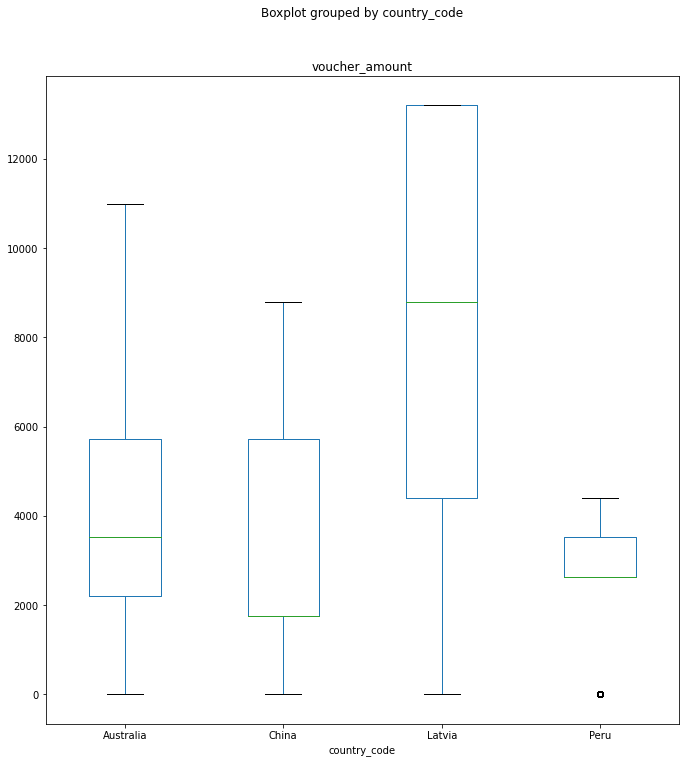

In [49]:
voucher_df_filtered_outlired.boxplot(by ='country_code', column =['voucher_amount'], grid = False,figsize = (11,12))

In [52]:
voucher_df_filtered_outlired.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 439173 entries, 0 to 511426
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   timestamp       439173 non-null  datetime64[ns, UTC]
 1   country_code    439173 non-null  object             
 2   last_order_ts   439173 non-null  datetime64[ns, UTC]
 3   first_order_ts  439173 non-null  datetime64[ns, UTC]
 4   total_orders    439173 non-null  int64              
 5   voucher_amount  439173 non-null  float64            
dtypes: datetime64[ns, UTC](3), float64(1), int64(1), object(1)
memory usage: 23.5+ MB


### Customer segmentation

In [53]:
frequency_dict = {
    range(0,5): "0-4",
    range(5,14): "5-13",
    range(14,38): "14-37"
}

In [54]:
frequency_dict.keys()

dict_keys([range(0, 5), range(5, 14), range(14, 38)])

In [55]:
from datetime import datetime, timezone

segment_names = ['recency_segment', 'frequent_segment']

def get_frequency_segment(total_orders):
    try:
        freq_seg = [frequency_dict[key] for key in frequency_dict if total_orders in key][0]
    except IndexError:
        return None
    else:
        return freq_seg

def str_to_timestamp(ts_str):
    try:
        str_ts = datetime.strptime(ts_str, '%Y-%m-%d %H:%M:%S%z')
        current_ts = datetime.now(timezone.utc)
    except ValueError:
        str_ts = datetime.strptime(ts_str, '%Y-%m-%d %H:%M:%S')
        current_ts = datetime.now()
    finally:
        return str_ts, current_ts

def get_recency_segment(last_order_ts):
    if isinstance(last_order_ts, str):
        last_order_ts, current_ts =  str_to_timestamp(last_order_ts)
    else:
        current_ts = datetime.now(timezone.utc)
    days_from_last_order = (current_ts - last_order_ts).days
    recency_seg = None
    if days_from_last_order in range(30, 61):
        recency_seg = "30-60"
    elif days_from_last_order in range(61,91): 
        recency_seg = "61-90"
    elif days_from_last_order in range(91,121):
        recency_seg = "91-120"
    elif days_from_last_order in range(121, 181): 
        recency_seg = "121-180"
    elif days_from_last_order > 180:
        recency_seg = "180+"

    return recency_seg

In [56]:
get_frequency_segment(4)

'0-4'

In [57]:
get_recency_segment('2020-04-19 00:00:00')

'180+'

In [58]:
voucher_df_filtered_outlired.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 439173 entries, 0 to 511426
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   timestamp       439173 non-null  datetime64[ns, UTC]
 1   country_code    439173 non-null  object             
 2   last_order_ts   439173 non-null  datetime64[ns, UTC]
 3   first_order_ts  439173 non-null  datetime64[ns, UTC]
 4   total_orders    439173 non-null  int64              
 5   voucher_amount  439173 non-null  float64            
dtypes: datetime64[ns, UTC](3), float64(1), int64(1), object(1)
memory usage: 23.5+ MB


In [83]:
pd.set_option('mode.chained_assignment',None)
voucher_df_filtered_outlired['frequent_segment'] = voucher_df_filtered_outlired['total_orders'].apply(get_frequency_segment)




In [84]:
voucher_df_filtered_outlired['recency_segment'] = voucher_df_filtered_outlired['last_order_ts'].apply(get_recency_segment)

In [85]:
voucher_df_filtered_outlired

timestamp country_code  \
0      2020-05-20 15:43:38.364972+00:00        China   
1      2020-05-20 15:43:47.914346+00:00        China   
2      2020-05-20 15:36:56.866239+00:00        China   
3      2020-05-20 15:00:33.694108+00:00        China   
4      2020-05-20 15:43:18.521402+00:00        China   
...                                 ...          ...   
511422 2020-04-03 18:31:36.635072+00:00       Latvia   
511423 2020-04-03 18:33:32.365196+00:00       Latvia   
511424 2020-04-03 19:23:07.711424+00:00         Peru   
511425 2020-04-03 19:19:06.162203+00:00    Australia   
511426 2020-04-03 19:23:30.054641+00:00    Australia   

                   last_order_ts            first_order_ts  total_orders  \
0      2020-04-19 00:00:00+00:00 2020-04-18 00:00:00+00:00             0   
1      2020-04-19 00:00:00+00:00 2020-04-13 00:00:00+00:00             1   
2      2020-04-19 00:00:00+00:00 2020-04-15 00:00:00+00:00             0   
3      2020-04-19 00:00:00+00:00 2020-04-13 00:00:00+00:00             0   
4      2020-04-19 00:00:00+00:00 2020-04-14 00:00:00+00:00             3   
...                          ...                       ...           ...   
511422 2020-01-04 00:00:00+00:00 2019-10-30 00:00:00+00:00            27   
511423 2020-01-04 00:00:00+00:00 2019-08-29 00:00:00+00:00            10   
511424 2020-01-04 00:00:00+00:00 2019-10-14 00:00:00+00:00            47   
511425 2020-01-04 00:00:00+00:00 2019-09-24 00:00:00+00:00             2   
511426 2020-01-04 00:00:00+00:00 2019-09-16 00:00:00+00:00             2   

        voucher_amount frequent_segment recency_segment  
0               5720.0              0-4            180+  
1               8800.0              0-4            180+  
2               1760.0              0-4            180+  
3               1760.0              0-4            180+  
4               8800.0              0-4            180+  
...                ...              ...             ...  
511422          4400.0            14-37            180+  
511423          4400.0             5-13            180+  
511424          4400.0             None            180+  
511425         11000.0              0-4            180+  
511426         11000.0              0-4            180+  

[439173 rows x 8 columns]

### Saving pre-processed voucher data

In [82]:
voucher_df_filtered_outlired.to_csv('vouchers_data.csv', index=False)

### Voucher Selection

In [86]:
voucher_df_filtered_outlired_peru = voucher_df_filtered_outlired[voucher_df_filtered_outlired['country_code'] == 'Peru']

In [87]:
voucher_df_filtered_outlired_peru['voucher_amount'].value_counts()

2640.0    43567
3520.0    17271
4400.0    16708
0.0        7177
Name: voucher_amount, dtype: int64

In [88]:
voucher_df_filtered_outlired_peru['voucher_amount'].describe()

count    84723.000000
mean      2942.837246
std       1125.807168
min          0.000000
25%       2640.000000
50%       2640.000000
75%       3520.000000
max       4400.000000
Name: voucher_amount, dtype: float64

In [89]:
voucher_df_filtered_outlired_peru['recency_segment'].describe()

count     84723
unique        1
top        180+
freq      84723
Name: recency_segment, dtype: object

In [90]:
voucher_df_filtered_outlired_peru['frequent_segment'].describe()

count     65140
unique        3
top         0-4
freq      36199
Name: frequent_segment, dtype: object

In [91]:
voucher_df_filtered_outlired_peru.groupby(['recency_segment'])['voucher_amount'].agg(pd.Series.mode).to_dict()

{'180+': 2640.0}

In [92]:
voucher_df_filtered_outlired_peru.groupby(['frequent_segment'])['voucher_amount'].agg(pd.Series.mode).to_dict()

{'0-4': 2640.0, '14-37': 2640.0, '5-13': 2640.0}

In [93]:
def get_voucher_amount(customer_segment, total_orders, last_order_ts):
    if customer_segment == 'recency_segment':
        voucher_amount = voucher_df_filtered_outlired_peru.groupby(['recency_segment'])['voucher_amount'].agg(pd.Series.mode).to_dict().get(get_recency_segment(last_order_ts))
    else:
        voucher_amount = voucher_df_filtered_outlired_peru.groupby(['frequent_segment'])['voucher_amount'].agg(pd.Series.mode).to_dict().get(get_frequency_segment(total_orders))
    return voucher_amount

In [94]:
get_voucher_amount('recency_segment', 30, '2020-04-19 00:00:00')

2640.0

In [95]:
get_voucher_amount('frequent_segment', 30, '2020-04-19 00:00:00')

2640.0

In [96]:
voucher_df_filtered_outlired_peru.isnull().sum()

timestamp               0
country_code            0
last_order_ts           0
first_order_ts          0
total_orders            0
voucher_amount          0
frequent_segment    19583
recency_segment         0
dtype: int64

In [97]:
voucher_df_filtered_outlired_peru.shape

(84723, 8)

In [100]:
voucher_df_filtered_outlired_peru_final = voucher_df_filtered_outlired_peru.dropna(axis=0, how='any')

In [101]:
voucher_df_filtered_outlired_peru_final.shape

(65140, 8)

In [102]:
voucher_df_filtered_outlired_peru_final.groupby(['frequent_segment'])['voucher_amount'].agg(pd.Series.mode).to_dict()

{'0-4': 2640.0, '14-37': 2640.0, '5-13': 2640.0}

In [103]:
voucher_df_filtered_outlired_peru_final.groupby(['recency_segment'])['voucher_amount'].agg(pd.Series.mode).to_dict()

{'180+': 2640.0}